In [8]:
!pip install transformers torch matplotlib nltk


In [ ]:
from transformers import pipeline
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


In [9]:
summarizer = pipeline(
    "summarization",
    model="facebook/bart-large-cnn"
)

print("✅ Summarization model loaded")


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


✅ Summarization model loaded


In [11]:
text = """
Education plays a vital role in shaping an individual's future.
Students often face challenges such as exam pressure, time management,
and career confusion. Effective study planning, regular revision, and
maintaining a healthy balance between academics and personal life are
essential for success. Guidance from teachers and mentors helps students
make informed career decisions and manage academic stress effectively.
"""


In [12]:
summary = summarizer(
    text,
    max_length=60,
    min_length=25,
    do_sample=False
)

summary_text = summary[0]["summary_text"]

print("📄 ORIGINAL TEXT:\n", text)
print("\n✂️ SUMMARY:\n", summary_text)


📄 ORIGINAL TEXT:
 
Education plays a vital role in shaping an individual's future.
Students often face challenges such as exam pressure, time management,
and career confusion. Effective study planning, regular revision, and
maintaining a healthy balance between academics and personal life are
essential for success. Guidance from teachers and mentors helps students
make informed career decisions and manage academic stress effectively.


✂️ SUMMARY:
 Education plays a vital role in shaping an individual's future. Effective study planning, regular revision and maintaining a healthy balance between academics and personal life are essential for success. Guidance from teachers and mentors helps students make informed career decisions and manage academic stress effectively.


In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
from nltk.tokenize import word_tokenize

original_words = len(word_tokenize(text))
summary_words = len(word_tokenize(summary_text))

print("Original Text Word Count:", original_words)
print("Summary Word Count:", summary_words)


Original Text Word Count: 67
Summary Word Count: 50


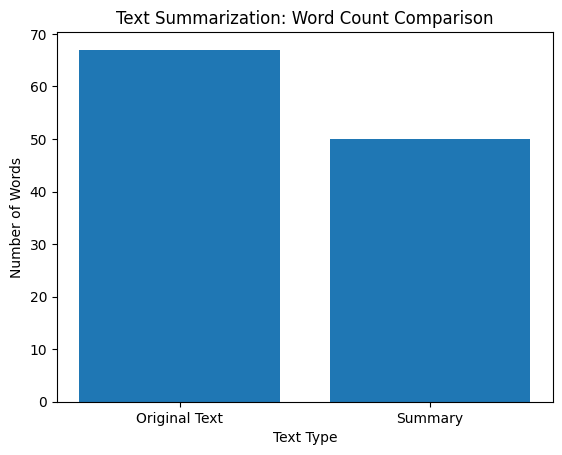

In [16]:
import matplotlib.pyplot as plt

labels = ["Original Text", "Summary"]
counts = [original_words, summary_words]

plt.figure()
plt.bar(labels, counts)
plt.title("Text Summarization: Word Count Comparison")
plt.ylabel("Number of Words")
plt.xlabel("Text Type")
plt.show()


In [17]:
compression_ratio = (summary_words / original_words) * 100
print(f"Compression Ratio: {compression_ratio:.2f}%")


Compression Ratio: 74.63%


In [18]:
original_sentences = text.count(".")
summary_sentences = summary_text.count(".")

print("Original sentences:", original_sentences)
print("Summary sentences:", summary_sentences)


Original sentences: 4
Summary sentences: 3


In [19]:
short_summary = summarizer(text, max_length=40, min_length=20, do_sample=False)
long_summary = summarizer(text, max_length=80, min_length=40, do_sample=False)

print("Short Summary:\n", short_summary[0]["summary_text"])
print("\nLong Summary:\n", long_summary[0]["summary_text"])


Short Summary:
 Education plays a vital role in shaping an individual's future. Effective study planning, regular revision, and maintaining a healthy balance between academics and personal life are essential for success. Guidance from

Long Summary:
 Education plays a vital role in shaping an individual's future. Effective study planning, regular revision, and maintaining a healthy balance between academics and personal life are essential for success. Guidance from teachers and mentors helps students make informed career decisions and manage academic stress effectively.


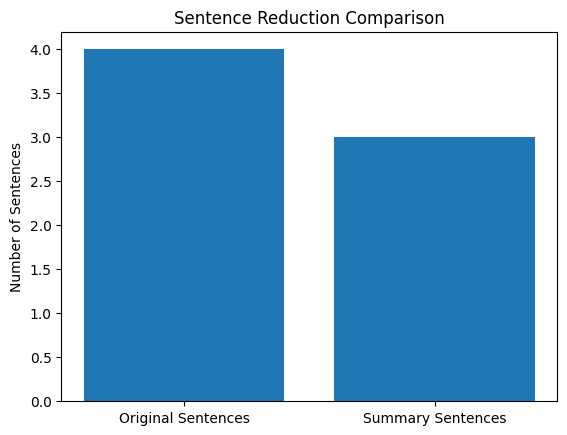

In [20]:
labels = ["Original Sentences", "Summary Sentences"]
counts = [original_sentences, summary_sentences]

plt.figure()
plt.bar(labels, counts)
plt.title("Sentence Reduction Comparison")
plt.ylabel("Number of Sentences")
plt.show()


In [21]:
text_ai = """
Artificial Intelligence is transforming various industries by automating
processes and improving decision-making. In education, AI-powered tools
assist students through personalized learning, content summarization,
and intelligent tutoring systems. However, ethical challenges such as
data privacy, bias, and transparency must be addressed to ensure
responsible and fair use of artificial intelligence technologies.
"""


In [22]:
summary_ai = summarizer(
    text_ai,
    max_length=60,
    min_length=25,
    do_sample=False
)

summary_ai_text = summary_ai[0]["summary_text"]

print("📄 ORIGINAL AI TEXT:\n", text_ai)
print("\n✂️ AI SUMMARY:\n", summary_ai_text)


📄 ORIGINAL AI TEXT:
 
Artificial Intelligence is transforming various industries by automating
processes and improving decision-making. In education, AI-powered tools
assist students through personalized learning, content summarization,
and intelligent tutoring systems. However, ethical challenges such as
data privacy, bias, and transparency must be addressed to ensure
responsible and fair use of artificial intelligence technologies.


✂️ AI SUMMARY:
 Artificial Intelligence is transforming various industries by automating processes and improving decision-making. In education, AI-powered tools assist students through personalized learning, content summarization, and intelligent tutoring systems. However, ethical challenges such as data privacy, bias, and transparency must be addressed to


In [23]:
original_ai_words = len(text_ai.split())
summary_ai_words = len(summary_ai_text.split())

print("Original AI Text Word Count:", original_ai_words)
print("AI Summary Word Count:", summary_ai_words)


Original AI Text Word Count: 50
AI Summary Word Count: 41


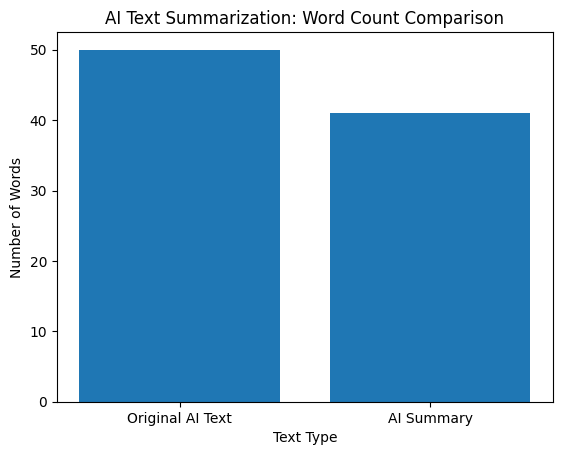

In [24]:
import matplotlib.pyplot as plt

labels = ["Original AI Text", "AI Summary"]
counts = [original_ai_words, summary_ai_words]

plt.figure()
plt.bar(labels, counts)
plt.title("AI Text Summarization: Word Count Comparison")
plt.ylabel("Number of Words")
plt.xlabel("Text Type")
plt.show()
